<a href="https://colab.research.google.com/github/SmileCat42/Deep-Learning/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab 5**
Krittaya Tantichaiyakul

1. แบ่งข้อมูล 5,000 รีวิวสำหรับ training set 5,000 รีวิวสำหรับ validation set และ
40,000 รีวิวสำหรับ testing

In [36]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [37]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)

In [38]:
print("ขนาดของ train_x : ",train_x.shape)
print("ขนาดของ test_x : ",test_x.shape)
print(train_x[0])
train_y[1]

ขนาดของ train_x :  (25000,)
ขนาดของ test_x :  (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


np.int64(0)

เนื่องจากโจทย์ต้องการ test ถึง 40000 รีวิว แต่เรามี test เพียงแค่ 25000 ดังนั้น เราจะต้องรวมทั้ง train และ test เป็นก้อนเดียวก่อน แล้วค่อยแบ่ง ออกเป็น 5000:5000:40000

In [39]:
x_all2=np.concatenate((train_x,test_x),axis=0)
y_all2=np.concatenate((train_y,test_y),axis=0)

ทำการเข้าฟังก์ชั่น vectorize เพื่อตรวจสอบว่ารีวิวแต่ละ index มีคำที่ออกบ่อยปรากฎอยู่หรือไม่

In [40]:
x_all = vectorize_sequences(x_all2)

y_all = np.asarray(y_all2).astype('float32')

In [41]:
print("train_x[0] : ",train_x[0])
print("train_y[2] : ",train_y[2])
print("x_all[3] : ",x_all[3])
print("y_all[4] : ",y_all[4])

train_x[0] :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train_y[2] :  0
x_all[3] :  [0. 1. 1. ... 0. 0

In [42]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000*1,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [43]:
network.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## <font color="red">**ทีมสีแดง**</font>

In [44]:
redx_train=x_all[:5000]
redx_valid=x_all[5000:10000]
redx_test=x_all[10000:]

redy_train=y_all[:5000]
redy_valid=y_all[5000:10000]
redy_test=y_all[10000:]

In [45]:
redhistory = network.fit(redx_train, redy_train,
epochs=7,
batch_size=512,
validation_data=(redx_valid, redy_valid))

Epoch 1/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.6022 - loss: 0.6671 - val_accuracy: 0.8056 - val_loss: 0.5555
Epoch 2/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8507 - loss: 0.5085 - val_accuracy: 0.8554 - val_loss: 0.4691
Epoch 3/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9122 - loss: 0.3998 - val_accuracy: 0.8646 - val_loss: 0.4159
Epoch 4/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9321 - loss: 0.3304 - val_accuracy: 0.8556 - val_loss: 0.3891
Epoch 5/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9321 - loss: 0.2863 - val_accuracy: 0.8736 - val_loss: 0.3537
Epoch 6/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9543 - loss: 0.2402 - val_accuracy: 0.8758 - val_loss: 0.3343
Epoch 7/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9655 - loss: 0.1939 - val_accuracy: 0.8546 - val_loss: 0.3574


In [46]:
history_dict = redhistory.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1 )

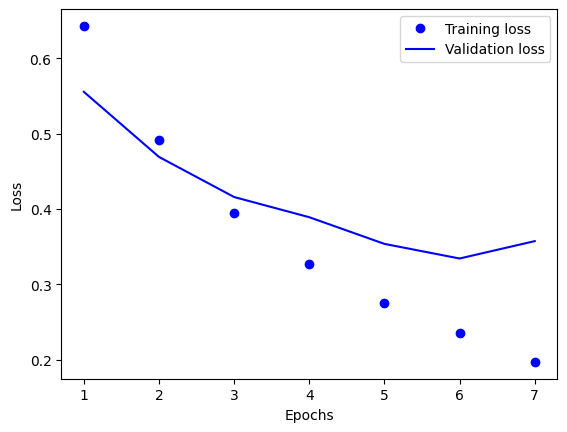

In [47]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend();
plt.show()

## <font color="blue">**ทีมสีน้ำเงิน**</font>

2. แบ่งข้อมูล 15,000 รีวิวสำหรับ training set 10,000 รีวิวสำหรับ validation set
และ 25,000 รีวิวสำหรับ testing

In [48]:
bluex_train=x_all[:15000]
bluex_valid=x_all[15000:25000]
bluex_test=x_all[25000:]

bluey_train=y_all[:15000]
bluey_valid=y_all[15000:25000]
bluey_test=y_all[25000:]

In [49]:
bluehistory = network.fit(bluex_train, bluey_train,
                        epochs=10,
                          batch_size=512,
                          validation_data=(bluex_valid, bluey_valid))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9005 - loss: 0.2747 - val_accuracy: 0.8815 - val_loss: 0.2956
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9319 - loss: 0.2075 - val_accuracy: 0.8871 - val_loss: 0.2822
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9461 - loss: 0.1751 - val_accuracy: 0.8800 - val_loss: 0.2966
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9528 - loss: 0.1503 - val_accuracy: 0.8827 - val_loss: 0.2967
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9587 - loss: 0.1280 - val_accuracy: 0.8786 - val_loss: 0.3118
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9689 - loss: 0.1129 - val_accuracy: 0.8828 - val_loss: 0.3138
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9734 - loss: 0.0983 - val_accuracy: 0.8685 - val_loss: 0.3692
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9776 - loss: 0.0850 - val_accuracy: 0.8804 - v

In [50]:
history_dict2 = bluehistory.history
history_dict2.keys()

Loss_value = history_dict2['loss']
val_Loss_value = history_dict2['val_loss']
epochs = range(1, len(Loss_value) + 1)

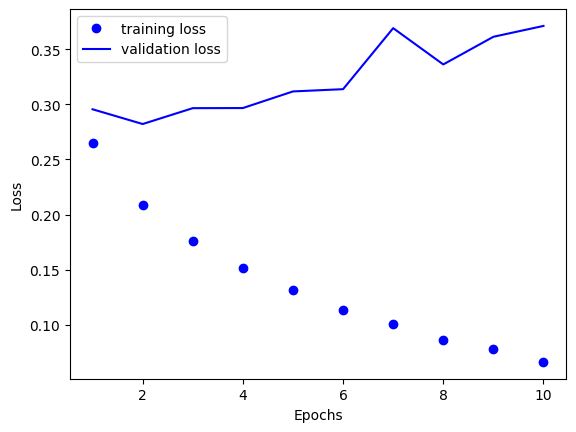

In [51]:
plt.plot(epochs, Loss_value, 'bo', label='training loss')
plt.plot(epochs, val_Loss_value, 'b', label='validation loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend();
plt.show()

3. เปรียบเทียบและวิเคราะห์ผล

จากการแบ่งข้อมูลออกเป็น 2 รูปแบบ พบว่าทีมสีแดง หรือข้อมูลที่แบ่งเป็น
5,000-5,000-40,000 ซึ่งมีจำนวนข้อมูลสำหรับการฝึกค่อนข้างน้อย โมเดลอาจยังเรียนรู้รูปแบบของข้อมูลได้ไม่เต็มที่ อย่างไรก็ตาม ค่า training accuracy และ validation accuracy มีแนวโน้มไปในทิศทางเดียวกัน และ validation loss ลดลงอย่างต่อเนื่อง จึงยังไม่เกิด overfitting อย่างชัดเจน แต่มีแนวโน้มของ underfitting เล็กน้อย

ในขณะที่ทีมสีน้ำเงิน หรือข้อมูลที่แบ่งเป็น 15,000-15,000-20,000 ทำให้โมเดลมีข้อมูลเพียงพอในการเรียนรู้ ส่งผลให้ training accuracy สูงขึ้นอย่างรวดเร็ว อย่างไรก็ตาม เมื่อทำการ train ต่อเนื่องหลาย epoch พบว่า validation accuracy เริ่มคงที่และลดลง ขณะที่ validation loss เพิ่มขึ้น ซึ่งเป็นลักษณะของ overfitting โดยมีสาเหตุมาจากการ train เกินจุดที่เหมาะสมเมื่อเทียบกับความซับซ้อนของโมเดล